<a href="https://colab.research.google.com/github/gpdsec/DataScience-Python/blob/master/Model_CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Importing libraries**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization, Input, MaxPool2D
from tensorflow.keras.models import Sequential, load_model, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **2. Loading the data**

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Input_meta/meta.csv')
df.columns

Index(['fname', 'label'], dtype='object')

In [3]:
def data_load(spath):
  img = image.load_img(spath)
  # Convert the image to a numpy array
  image_array = image.img_to_array(img)
  return image_array



In [4]:
def dataset():

  Images = []
  label = []
  for i in range(len(df)):
    if df['label'][i]==1:
      spath = '/content/drive/My Drive/Colab Notebooks/Spectrogram/cough/'+df['fname'][i]
      label.append(1)
    else:
      spath = '/content/drive/My Drive/Colab Notebooks/Spectrogram/nocough/'+df['fname'][i]
      label.append(0)
    Images.append(data_load(spath))
    print(i+1)
  X = np.array(Images)
  Y = np.array(label)
  return X, Y
  

In [5]:
#X, Y = dataset()
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


## **3. Data Normalization**

In [6]:
x_train = x_train/255
x_test = x_test/255


In [7]:
x_train.shape

(1465, 240, 240, 3)

## **4. Defining Variables**

In [8]:
es = EarlyStopping(monitor='loss', patience=3)
filepath="/content/drive/My Drive/Colab Notebooks/Saved_M/bestmodel.h5"
md = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                     save_best_only=True, save_weights_only=False, mode='min')

In [15]:
epochs = 20
num_classes = 2
batch_size = 64
input_shape = (240, 240, 3)
adam = tf.keras.optimizers.Adam(0.001)

# **5. Build the model using Sequential API**

In [16]:
# Build the model using the functional API
i = Input(shape=input_shape)
#x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
#x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
#x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
#x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
#x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
model.compile(optimizer= adam, loss= tf.keras.losses.binary_crossentropy, metrics=["accuracy"])

# Model Summery
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 240, 240, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 240, 240, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 240, 240, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 120, 120, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 120, 120, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 120, 120, 64)      18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 120, 120, 64)      3692

In [17]:


History = model.fit(x_train,
                    y_train, 
                    batch_size=batch_size,
                    epochs = epochs,
                    verbose=2,
                    validation_data = (x_test, y_test),
                    callbacks = [es,md],
                    shuffle= True
                    )



Epoch 1/20

Epoch 00001: loss did not improve from 0.19037
23/23 - 9s - loss: 0.3316 - accuracy: 0.8976 - val_loss: 0.3434 - val_accuracy: 0.9428
Epoch 2/20

Epoch 00002: loss did not improve from 0.19037
23/23 - 7s - loss: 0.2300 - accuracy: 0.9324 - val_loss: 0.1993 - val_accuracy: 0.9428
Epoch 3/20

Epoch 00003: loss did not improve from 0.19037
23/23 - 7s - loss: 0.2318 - accuracy: 0.9324 - val_loss: 0.2194 - val_accuracy: 0.9428
Epoch 4/20

Epoch 00004: loss did not improve from 0.19037
23/23 - 7s - loss: 0.2157 - accuracy: 0.9324 - val_loss: 0.2505 - val_accuracy: 0.9428
Epoch 5/20

Epoch 00005: loss did not improve from 0.19037
23/23 - 7s - loss: 0.2012 - accuracy: 0.9324 - val_loss: 0.1682 - val_accuracy: 0.9428
Epoch 6/20

Epoch 00006: loss did not improve from 0.19037
23/23 - 7s - loss: 0.1963 - accuracy: 0.9324 - val_loss: 0.1548 - val_accuracy: 0.9428
Epoch 7/20

Epoch 00007: loss improved from 0.19037 to 0.16583, saving model to /content/drive/My Drive/Colab Notebooks/Save

## **6. Plot**

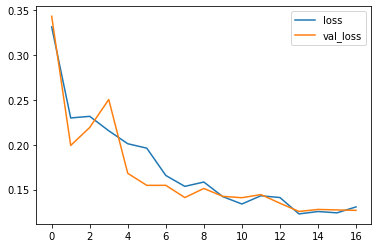

In [18]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(History.history['loss'], label='loss')
plt.plot(History.history['val_loss'], label='val_loss')
plt.legend()

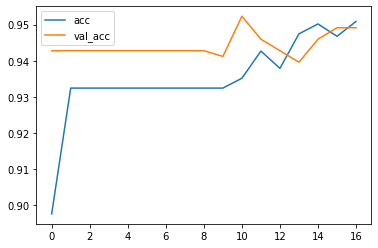

In [19]:
# Plot accuracy per iteration
plt.plot(History.history['accuracy'], label='acc')
plt.plot(History.history['val_accuracy'], label='val_acc')
plt.legend()

In [14]:
## 7. Single Prediction